<p align="center">
<FONT FACE="times new roman" SIZE=5>
<br>
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png"
width="200" height="200">
</img>
<br>
<i><b>Docente:</b></i> John Corredor, PhD.
<br>
<i><b>Asignatura:</b></i> HPC Introducción 
<br>
<i><b>Estudiantes:</b></i><br>Kevin Fabian Chepe Astudillo
<br>
<i><b>Tema:</b></i> Parcial Final
<br>
23/11/22
<br>
</FONT>
</p>

##__Advertising DataSet__

El Dataset Advertising recoge los ingresos por ventas generadas con respecto a los costes de la publicidad en múltiples canales como la radio, la televisión y los periódicos. 

>>Columnas
* 0 - TV
* 1 - Radio
* 2 - NewsPaper
* 3 - Sales


_El dataset está tomado de Kaggle_

## __Importar modulos__

In [ ]:
import pandas as pd     
import numpy as np         
import seaborn as sns      
import matplotlib.pyplot as plt    
import scipy.stats as stats         
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import SGDRegressor

#__Análisis exploratorio__

## __Preparación de los datos__

Cargue los datos en un `DataFrame` y asigne los nombres a las columnas (si es necesario).

In [ ]:
url = 'https://raw.githubusercontent.com/Kuzzye/HPC/main/Csv/advertisingdata.csv'
data = pd.read_csv(url, header= None)

Genere un resumen de los datos a través del método `info()` y verifique si el tipo de datos de cada columna es correcto.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       200 non-null    float64
 1   1       200 non-null    float64
 2   2       200 non-null    float64
 3   3       200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
data

,0,1,2,3
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


## __Promedio__

Se calculo el promedio de las columnas y se valida en el modelo de C++

imagen.png

In [ ]:
data.mean()

0    147.0425
1     23.2640
2     30.5540
3     15.1305
dtype: float64

## __Desviación Estadar__

Se calcula la desviación de los datos se valida en el modelo de C++

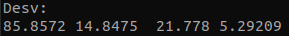

In [ ]:
data.std()

0    85.854236
1    14.846809
2    21.778621
3     5.283892
dtype: float64

## __Matriz de correlación__

La matriz de correlación es la mejor manera de apreciar el comportamiento de los datos y visualizar la relación.


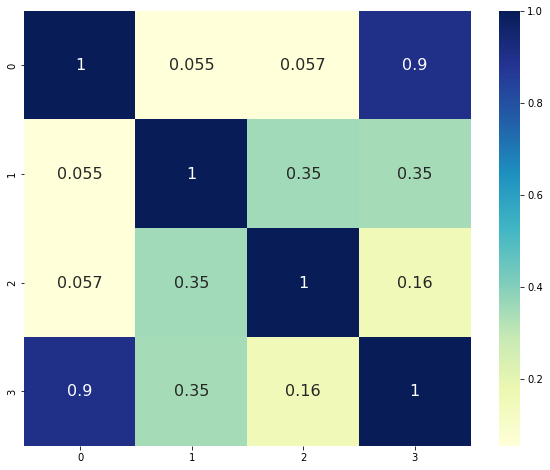

In [ ]:
plt.figure(figsize=(10, 8))
plt.rc({'size': '18'})
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu", annot_kws={"size":16})

matriz de dispersión de las variables para identificar si hay correlación entre las variables.

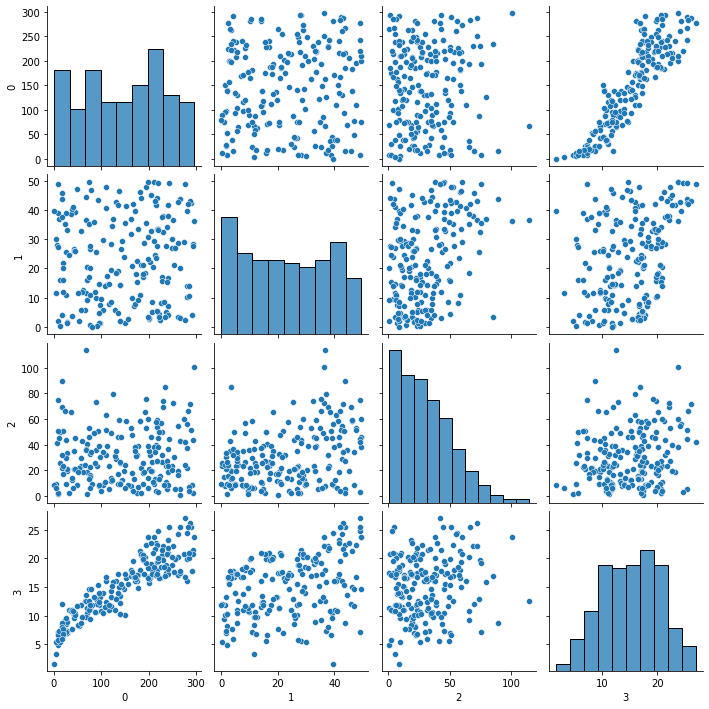

In [ ]:
sns.pairplot(data)

Identifique posibles valores atípicos en los datos.

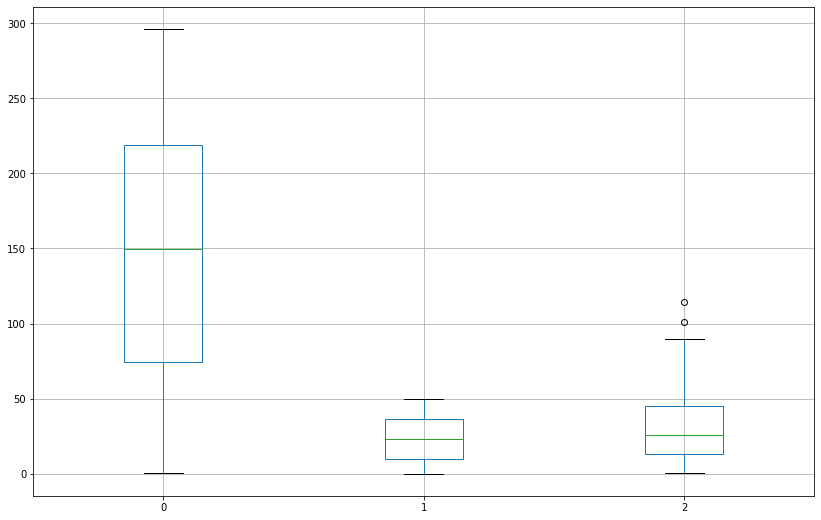

In [ ]:
data[[0, 1, 2]].boxplot(figsize=(14,9), )
plt.show()

# __Regresión Lineal__

## __Normalizar los datos__

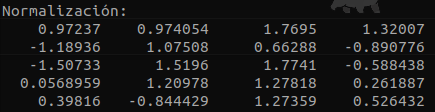

In [ ]:
stats.zscore(data)

,0,1,2,3
0,0.969852,0.981522,1.778945,1.322319
1,-1.197376,1.082808,0.669579,-0.897515
2,-1.516155,1.528463,1.783549,-0.593948
3,0.052050,1.217855,1.286405,0.259834
4,0.394182,-0.841614,1.281802,0.525455
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,-1.428757
196,-0.617035,-1.240003,-1.033598,-0.214489
197,0.349810,-0.942899,-1.111852,-0.062706
198,1.594565,1.265121,1.640850,1.967398


## __Entrenamiento y modelo__

Separar las variables dependientes de los independientes

In [ ]:
X=data[[0,1,2]]
y=data[[3]]

Variable independiente

In [ ]:
print(X)

         0     1     2
0    230.1  37.8  69.2
1     44.5  39.3  45.1
2     17.2  45.9  69.3
3    151.5  41.3  58.5
4    180.8  10.8  58.4
..     ...   ...   ...
195   38.2   3.7  13.8
196   94.2   4.9   8.1
197  177.0   9.3   6.4
198  283.6  42.0  66.2
199  232.1   8.6   8.7

[200 rows x 3 columns]


Variable dependiente

In [ ]:
print(y)

        3
0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
..    ...
195   7.6
196  14.0
197  14.8
198  25.5
199  18.4

[200 rows x 1 columns]


Se genera un conjunto de datos de prueba con el 20% de los datos disponibles.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0, train_size = 0.8)

In [ ]:
X_train

,0,1,2
134,36.9,38.6,65.6
66,31.5,24.6,2.2
26,142.9,29.3,12.6
113,209.6,20.6,10.7
168,215.4,23.6,57.6
...,...,...,...
67,139.3,14.5,10.2
192,17.2,4.1,31.6
117,76.4,0.8,14.8
47,239.9,41.5,18.5


Se crea el modelo para los datos de entrenamiento

In [ ]:
lineal_regresion = LinearRegression()

Se realiza el 'fit' de la regresión con los datos de entrenamiento

In [ ]:
DFt=lineal_regresion.fit(X_train, y_train)

Se obtienen los coeficientes theta del modelo

In [ ]:
print(lineal_regresion .coef_)

[[ 0.05368006  0.11152624 -0.00351166]]


Coeficientes para los datos de prueba


In [ ]:
lineal_regresion.fit(X_test, y_test)

LinearRegression()

In [ ]:
print(lineal_regresion .coef_)

[[0.05844516 0.08002981 0.02198091]]


Se revisa que tan bueno fue el modelo a traves de la metrica de rendimiento

imagen.png

In [ ]:
r2 = DFt.score(X_test, y_test)

print("Metrica de R2 Score: ", r2)

Metrica de R2 Score:  0.8765948711365155


## __Modelos__

Se construye un modelo para cada uno de los medios publicitarios disponibles (un modelo por cada característica)(0-TV, 1-Radio, 2-NewsPaper). se utiliza un pipeline de preprocesamiento generado con el estimador correspondiente. Para este caso utilizaremos la clase `SGDRegressor`.

In [ ]:
model_result = {}
X_train, y_train = data.drop(3, axis='columns'), data[3]

In [ ]:
for feature in X_train.columns:
  
  regressorSGD = Pipeline(
      steps=[("numerical_imputer", SimpleImputer(strategy='mean')), 
           ("scaler", StandardScaler()), 
           ("sgd", SGDRegressor())])
  
  regressorSGD.fit(X_train[feature].values.reshape(-1,1), y_train)

  model_result[feature] = regressorSGD

Se genera un gráfico con los datos de entrenamiento y la línea de regresión por cada variable.

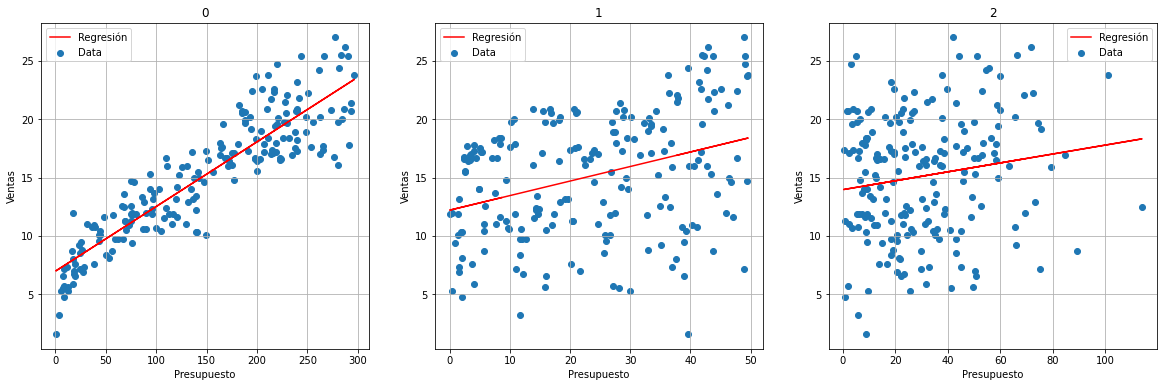

In [ ]:
fig, axes = plt.subplots(1, len(X_train.columns), figsize=(20, 6))

for i in range(3):
  X_values = X_train.iloc[:,i].values.reshape(-1, 1)
  y_values = y_train.values.reshape(-1, 1)

  axes[i].scatter(data.iloc[:,i], y_values, label='Data')
  model = model_result[X_train.columns[i]]
  predicted = model.predict(X_values)

  axes[i].plot(data.iloc[:,i], predicted, color='red', label='Regresión')
  axes[i].set_title(X_train.columns[i])
  axes[i].set_xlabel('Presupuesto')
  axes[i].set_ylabel('Ventas')
  axes[i].grid()
  axes[i].legend()

Se comparan los coeficientes de determinación $R^2$ obtenidos mediante un diagrama de barras

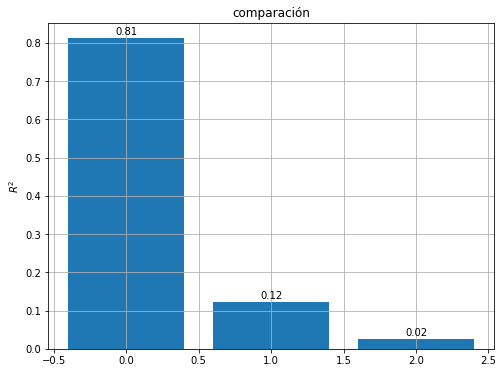

In [ ]:
scores = []
for i, feature in enumerate(X_train.columns):
  X_values = X_train.iloc[:,i].values.reshape(-1, 1)
  y_values = y_train.values.reshape(-1, 1)
  model = model_result[feature]
  scores.append(model.score(X_values, y_values))

plt.figure(figsize=(8,6))
plt.bar(X_train.columns, scores)
plt.ylabel('$R^2$')
plt.title('comparación')
plt.grid()

def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] + 0.01, round(y[i],2), ha = 'center')

add_labels(X_train.columns, scores)